In [43]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("spam_Emails_data.csv", sep = ',')

In [3]:
data.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


In [4]:
data.isnull().sum()

label    0
text     2
dtype: int64

In [5]:
data = data.dropna(subset = ['label', 'text']).reset_index(drop = True)

In [6]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [7]:
data['text'] = data['text'].str.lower()
data['label'] = LabelEncoder().fit_transform(data['label'])

X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [8]:
vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [9]:
model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

C:\Users\Murad Mammadzade\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.9724271343822544
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     20317
           1       0.96      0.98      0.97     18453

    accuracy                           0.97     38770
   macro avg       0.97      0.97      0.97     38770
weighted avg       0.97      0.97      0.97     38770



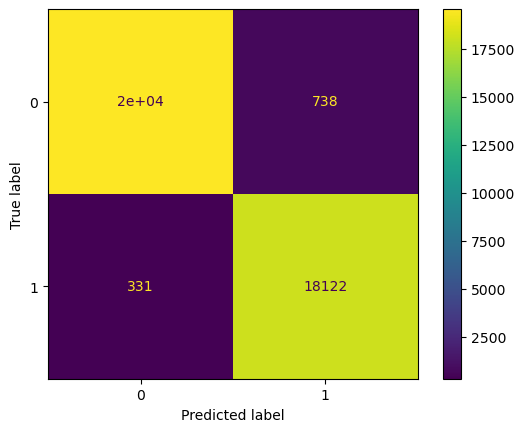

In [44]:
y_pred = model.predict(X_test_vectorized)

accuracy = accuracy_score(Y_test, y_pred)
conf_m = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")

print(f"Classification Report:")
print(report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=model.classes_)
disp.plot()
plt.show()

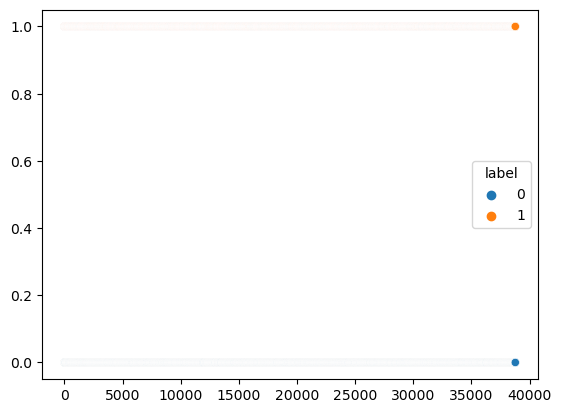

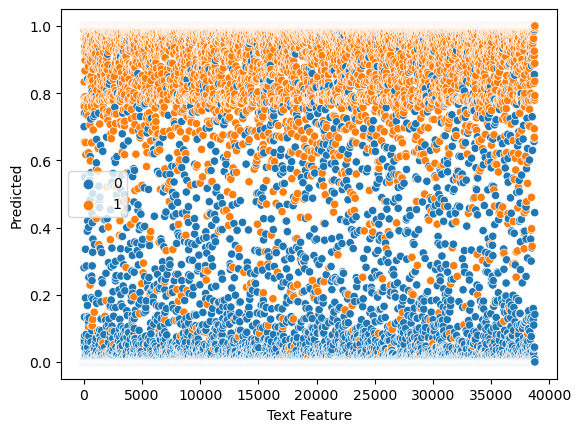

In [41]:
y_pred = y_pred.squeeze()
y_prob = model.predict_proba(X_test_vectorized)

# Plot scatter plot
sns.scatterplot(x= range(len(y_pred)), y=y_pred, hue= Y_test)
plt.figure()
sns.scatterplot(x = range(len(y_pred)), y = y_prob[:,1], hue = Y_test)
plt.xlabel('Text Feature')
plt.ylabel('Predicted')
plt.legend()
plt.show()